---   

<h1 align="center">Introduction to Data Analyst and Data Science for beginners</h1>
<h1 align="center">Lecture no 2.11(Pandas-02)</h1>

---
<h3><div align="right">Ehtisham Sadiq</div></h3>    

<img align="right" width="400" height="400"  src="images/pandas-apps.png"  >

## _Overview of Pandas Series Data Structure.ipynb_

#### Read about Pandas Data: https://pandas.pydata.org/docs/user_guide

### Recap:
**In the last lecture, we discussed the pandas library and overview of the pandas dataframe and its anatomy and we have seen that every pandas dataframe is composed of a series objects.**

## Learning agenda of this notebook

1. Overview of Python Pandas library and its data structures
2. Creating a Series
    - From Python List
    - From NumPy Arrays
    - From Python Dictionary
    - From a scalar value
    - Creating empty series object
3. Attributes of a Pandas Series
4. Understanding Index in a Series and its usage
    - Identification
    - Selection/Filtering/Subsetting
    - Alignment

In [1]:
# To install this library in Jupyter notebook
import sys
!{sys.executable} -m pip install pandas --quiet

In [2]:
import pandas as pd
pd.__version__ , pd.__path__

('1.4.2', ['/home/dell/.local/lib/python3.8/site-packages/pandas'])

<img align="right" width="500" height="600"  src="images/series-anatomy.png"  >

## 1. Creating a Series
> **A Series is a one-dimensional array capable of holding a sequence of values of any data type (integers, floating point numbers, strings, Python objects etc) which by default have numeric data labels starting from zero. You can imagine a Pandas Series as a column in a spreadsheet or a Pandas Dataframe object.**
- To create a Series object you can use `pd.Series()` method

**```pd.Series(data, index, dtype, name)```**
- Where,
   - `data`: can be a Python list, Python dictionary, numPy array, or a scalar value.
   - `index`: If you donot pass the index argument, it will default to `np.arrange(n)`. Indices must be hashable (numbers or strings) and have the same length as `data`. Non-unique index values are allowed. Index is used for three purposes:
       - Identification.
       - Selection.
       - Alignment.
   - `dtype`: Optionally, you can assign any valid numpy datatype to the series object (np.sctypes). If not specified, this will be inferred from `data`.
   - `name`: Optionally, you can assign a name to a series, which becomes attribute of the series object. Moreover, it becomes the column name, if that series object is used to create a dataframe later.

### a. Creating a Series from Python List

In [118]:
import pandas as pd
import numpy as np
list1 = ['Ehtisham', 'Ali', 'Ayesha', '','Dua']  # note the empty string

# When index is not provided, it creates an index for the data starting from zero and with a step size of one.
s = pd.Series(data=list1)
print(s)
print(type(s))

0    Ehtisham
1         Ali
2      Ayesha
3            
4         Dua
dtype: object
<class 'pandas.core.series.Series'>


>Observe that output is shown in two columns - the index is on the left and the data value is on the right. If we do not explicitly specify an index for the data values while creating a series, then by default indices range from 0 through N – 1. Here N is the number of data elements.

**You can explicitly specify the index for a Series object, which can be either int or string type, and must be of the same size as the values in the series. Otherwise, it will raise a ValueError**

In [4]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua']
indices = ['MS01', 'MS02', '', 'MS02']   # non-unique index values are allowed and you can have empty string as index

s = pd.Series(data=list1, index=indices)
print(s)
print(type(s))

MS01    Ehtisham
MS02         Ali
          Ayesha
MS02         Dua
dtype: object
<class 'pandas.core.series.Series'>


>Also note that non-unique indices are allowed

In [5]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua']
indices = [2.1, 2.2, 2.3, 2.4]   

s = pd.Series(data=list1, index=indices)
print(s)
print(type(s))

2.1    Ehtisham
2.2         Ali
2.3      Ayesha
2.4         Dua
dtype: object
<class 'pandas.core.series.Series'>


**You can create a series with NaN values, using `np.nan`, which is IEEE 754 floating-point representation of Not a Number. NaN values can act as a placeholder for any missing numerical values in the array.**

In [6]:
list1 = [1, 2.7, np.nan, 54]
s = pd.Series(data=list1)
print(s)
print(type(s))

0     1.0
1     2.7
2     NaN
3    54.0
dtype: float64
<class 'pandas.core.series.Series'>


>Also note the `dtype` of the series object is inferred from the data as `float64`

**You can use the `dtype` argument to specify a datatype to the series object.**

In [7]:
list1 = [27, 33, 19]
s = pd.Series(data=list1, dtype=np.uint8)
print(s)
print(type(s))

0    27
1    33
2    19
dtype: uint8
<class 'pandas.core.series.Series'>


**Optionally, you can assign a name to a series, which becomes attribute of the series object. Moreover, it becomes the column name, if that series object is used to create a dataframe later.**

In [8]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua']
indices = ['MS01', 'MS02', 'MS03', 'MS04']
s = pd.Series(data=list1, index=indices, name='myseries1') 
print(s)
print(type(s))

MS01    Ehtisham
MS02         Ali
MS03      Ayesha
MS04         Dua
Name: myseries1, dtype: object
<class 'pandas.core.series.Series'>


### b. Creating a Series from NumPy Array

In [9]:
s = pd.Series(data = np.arange(4))
print(s)
print(type(s))

0    0
1    1
2    2
3    3
dtype: int64
<class 'pandas.core.series.Series'>


In [10]:
arr1 = np.array([22.3,33.6, 98, 44])
s = pd.Series(data=arr1, dtype='float64')
print(s)
print(type(s))

0    22.3
1    33.6
2    98.0
3    44.0
dtype: float64
<class 'pandas.core.series.Series'>


### c. Creating a Series from Python Dictionary

In [11]:
my_dict = {
    'name':"Ehtisham", 
    'gender':"Male", 
    'Role':"Student", 
    'subject':"Operating System"}
s = pd.Series(data=my_dict)
print(s)
print(type(s))

name               Ehtisham
gender                 Male
Role                Student
subject    Operating System
dtype: object
<class 'pandas.core.series.Series'>


**When you create a series from dictionary, it will automatically take the keys as index and the value as data**

### d. Creating a Series from Scalar value

In [12]:
s = pd.Series(data=25)
print(s)
print(type(s))

0    25
dtype: int64
<class 'pandas.core.series.Series'>


### e. Creating an Empty Series

In [15]:
# Need to pass atleast `dtype` else you get a warning
s=pd.Series()
print(s)
print(type(s))

Series([], dtype: float64)
<class 'pandas.core.series.Series'>


/tmp/ipykernel_22825/938514528.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s=pd.Series()


## 3. Attributes of Pandas  Series
- We can access certain properties called attributes of a series by using that property with the series name using dot `.` notation
- Mostly attributes of pandas series are similar to pandas dataframe.

In [16]:
my_dict = {0:"Ehtisham", 1:np.nan, 2:"Ali", 3:"Ayesha", 4:"Dua", 5:"Khubaib", 6:"Adeen"}
s = pd.Series(my_dict, name="myseries1")
s

0    Ehtisham
1         NaN
2         Ali
3      Ayesha
4         Dua
5     Khubaib
6       Adeen
Name: myseries1, dtype: object

In [14]:
# `name` attribute of a series object return the name of the series object
s.name

'myseries1'

In [15]:
# `index` attribute of a series object return the list of indices and its datatype
s.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [17]:
# `values` attribute of a series object return the list of values and its datatype
s.values

array(['Ehtisham', nan, 'Ali', 'Ayesha', 'Dua', 'Khubaib', 'Adeen'],
      dtype=object)

In [18]:
# `dtype` attribute of a series object return the type of underlying data
s.dtype

dtype('O')

In [20]:
# `shape` attribute of a series object return a tuple of shape of underlying data
s.shape

(7,)

In [19]:
# `nbytes` attribute of a series object return the number of bytes of underlying data (object data type take 8 bytes)
s.nbytes

56

In [20]:
# `size` attribute of a series object return number of elements in the underlying data
s.size

7

In [22]:
# `ndim` attribute of a series object return number of dimensions of underlying data
s.ndim

1

In [21]:
# `hasnans` attribute of a series object return true if there are NaN values in the data
s.hasnans

True

<img align="right" width="500" height="500"  src="images/series-anatomy.png"  >

## 4. Understanding Index in a Series
- Every series object has an index associated with every item. 
- The Pandas series object supports both integer-based (default) and label/string-based indexing and provides a host of methods for performing operations involving the index.
<br><br>
    - When index is unique, Pandas use a hashtable to map `key to value` and searching can be done in O(1) time. 
    - When index is non-unique but sorted, Pandas use binary search, which takes logarithmic time O(logN).
    - When index is randomly ordered, searching takes linear time, as Pandas need to check all the keys in the index O(N).<br><br>
- Index in series object is used for three purposes:
    - Identification
    - Selection/Filtering/Subsetting
    - Alignment <br><br>

### a. Changing Index of a Series Object
- In above examples, we have seen that
    - If we create a Series object from dictionary, the keys of dictionray become the index 
    - If we create a Series object from a list or numPy array, the index defaults to integers from 0, 1, 2, ...
    - Last but not the least, we can assign the indices of our own choice, which can be integers or strings
- Let us see as how we can change the indices of a series object after creation

In [22]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua','Adeen']

s = pd.Series(data=list1)
print(s)
print(s.index)

0    Ehtisham
1         Ali
2      Ayesha
3         Dua
4       Adeen
dtype: object
RangeIndex(start=0, stop=5, step=1)


>Index attribute of series object shows that index range for this series is from (0-4) with step value of 1

**Let us modify the index of this series object to some random integers by assigning a random array of integers to `index` attribute of this series object**

In [23]:
arr1 = np.random.randint(low = 100, high = 200, size = 5)

s.index = arr1

print(s)
print(s.index)

199    Ehtisham
137         Ali
133      Ayesha
194         Dua
148       Adeen
dtype: object
Int64Index([199, 137, 133, 194, 148], dtype='int64')


In [24]:
s.index = [1,4,2,6.3,9]

print(s)
print(s.index)

1.0    Ehtisham
4.0         Ali
2.0      Ayesha
6.3         Dua
9.0       Adeen
dtype: object
Float64Index([1.0, 4.0, 2.0, 6.3, 9.0], dtype='float64')


**Changing index of a series to a list of strings**

In [25]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua','Adeen']

s = pd.Series(data=list1)
print(s)
print(s.index)

0    Ehtisham
1         Ali
2      Ayesha
3         Dua
4       Adeen
dtype: object
RangeIndex(start=0, stop=5, step=1)


In [26]:
indices = ['num1', 'num2', 'num3', 'num4', 'num5']

s.index = indices

print(s)
print(s.index)

num1    Ehtisham
num2         Ali
num3      Ayesha
num4         Dua
num5       Adeen
dtype: object
Index(['num1', 'num2', 'num3', 'num4', 'num5'], dtype='object')


<img align="right" width="300" height="300"  src="images/series-anatomy.png"  >

### b. First use of Index (Identification)
- The main purpose of index is to identify or search the element of series object.
- Since every data value of a series object has an associated index (integer or string). So we can use this index/label to identify or access data value(s)
- There are three ways to access elements of a series:
    - Using `s[]` operator and specifying the index (integer/label)
    - Using `s.loc[]` method and specifying the index (integer/label)
    - Using `.iloc[]` method and specify the position (an integer value from 0 to length-1). It also support negative indexing, the last element can be accessed by an index of -1

**Identification using Integer Indices or by Position**

In [28]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua','Adeen']

indices = [5, 10, 15, 20, 25]
s = pd.Series(data=list1, index=indices)
s

5     Ehtisham
10         Ali
15      Ayesha
20         Dua
25       Adeen
dtype: object

In [29]:
# Give index to subscript operator
s[25]

# Subscript operator do not work on position
#s[0] # will raise an error because index 0 do not exist

'Adeen'

In [30]:
# Give index to  loc method
s.loc[20]
# loc method do not work on position
#s.loc[0] # will raise an error because index 0 do not exist

'Dua'

In [45]:
# iloc method is position based, so will flag an error if you pass an actual index
#s.iloc[20] 

In [31]:
# The iloc method is passed position and not index
s.iloc[3]


'Dua'

**Fancy Indexing**

In [32]:
# Can access multiple values by specifying a list of indices
s[[20, 5]]

20         Dua
5     Ehtisham
dtype: object

In [33]:
# Can access multiple values by specifying a list of indices
s.loc[[20, 5]]

20         Dua
5     Ehtisham
dtype: object

In [34]:
# Can access multiple values by specifying list of positions
s.iloc[[3, 0]]

20         Dua
5     Ehtisham
dtype: object

**Negative Indexing, work only for `iloc`**

In [35]:
#s[-1]
#s.loc[-1]
s.iloc[-1]

'Adeen'

**Identification using String Indices or by Position**

In [36]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua','Adeen']

indices = ['num1', 'num2', 'num3', 'num4', 'num5']
s = pd.Series(data=list1, index=indices)
s

num1    Ehtisham
num2         Ali
num3      Ayesha
num4         Dua
num5       Adeen
dtype: object

In [37]:
# Give index to subscript operator (which in this case is a string or label)
s['num1']

'Ehtisham'

In [38]:
# for position as well
s[2]

'Ayesha'

In [39]:
# Give index to  loc method (which in this case is a string or label)
s.loc['num1']

'Ehtisham'

In [1]:
# Will not work on position the way [] worked previously
#s.loc[0]

In [40]:
# iloc method is position based, so will flag an error if you pass it string indices
#s.iloc['num1'] 
# however will work fine if you pass an integer specifying the position
s.iloc[0]

'Ehtisham'

In [41]:
s.iloc[-1]

'Adeen'

**Fancy Indexing**

In [42]:
# Can access multiple values by specifying a list of indices (which in this case are strings or labels)
s[['num3', 'num1']]

num3      Ayesha
num1    Ehtisham
dtype: object

In [43]:
# Can access multiple values by specifying a list of indices (which in this case are strings or labels)
s.loc[['num3', 'num1']]

num3      Ayesha
num1    Ehtisham
dtype: object

In [44]:
# iloc method is position based, so will flag an error if you pass it string indices
#s.iloc['num3', 'num1'] 
# however will work fine if you pass an integer specifying the position
s.iloc[[2,0]]

num3      Ayesha
num1    Ehtisham
dtype: object

<img align="right" width="400" height="400"  src="images/series-anatomy.png"  >

### c. Second use of Index (Selection)
- A series can be sliced using `:` symbol, which returns a subset of a series object (values with corresponding indices).
- There are three arguments of slice object `[[start]:[stop][:step]]`, and all are optional

- The slice object can be used in three ways to slice a Pandas Series object::
    - Using `s[]` operator and specifying the index (integer/label)
    - Using `s.loc[]` method and specifying the index (integer/label)
    - Using `.iloc` method and specify the position (an integer value from 0 to length-1). It also support negative indexing, the last element can be accessed by an index of -1
- Keep following points in mind:
    - The `stop` argument is NOT inclusive for `s[]` for integer indices, while it is inclusive for string indices.
    - The `stop` argument is inclusive for `s.loc[]` for both integer and label indices.
    - The `stop` argument is NOT inclusive for `s.iloc[]` being position based.
  
>**Note: Once you slice a Pandas series, you get a view of the original object, which is similar to shallow copy. So if you modify an element in original series object, the change will also be visible in the other series object.**

**Selection/Filtering/Subsetting of Series object having Integer indices**

In [45]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua','Adeen']

indices = [5, 10, 15, 20, 25]
s = pd.Series(data=list1, index=indices)
s

5     Ehtisham
10         Ali
15      Ayesha
20         Dua
25       Adeen
dtype: object

In [67]:
s[5:15]

Series([], dtype: object)

In [46]:
# The subscript operator considers the slice object as positional index and not as the actual indices 
# (if we have integer indices)
# The `stop` argument is NOT inclusive for `s[]` for integer indices
s[1:4]

10       Ali
15    Ayesha
20       Dua
dtype: object

In [47]:
#The loc[] method considers the slice object as actual indices and not as positional indices
# The stop argument is inclusive for `s.loc[]` for both integer and label indices
s.loc[5:15]

5     Ehtisham
10         Ali
15      Ayesha
dtype: object

In [48]:
# The iloc[] method considers the slice object as positional index and not as the actual indices
# The `stop` argument is NOT inclusive for `s.iloc[]` being position based
s.iloc[1:4]

10       Ali
15    Ayesha
20       Dua
dtype: object

**Selection/Filtering/Subsetting of Series object having String Indices**

In [49]:
list1 = ['Ehtisham', 'Ali', 'Ayesha', 'Dua','Adeen']

indices = ['num1', 'num2', 'num3', 'num4', 'num5']
s = pd.Series(data=list1, index=indices)
s

num1    Ehtisham
num2         Ali
num3      Ayesha
num4         Dua
num5       Adeen
dtype: object

In [50]:
s[0:2]

num1    Ehtisham
num2         Ali
dtype: object

In [51]:
# The subscript operator considers the slice object as positional index and not as the actual indices
# (if we have integer indices). However, will also consider the actual indices in case of string indices
# The `stop` argument is inclusive for `s[]` for string indices, while it is NOT inclusive for integer indices.
s['num2':'num4']

num2       Ali
num3    Ayesha
num4       Dua
dtype: object

In [52]:
# The `stop` argument is inclusive for `s[]` for string indices, while it is NOT inclusive for integer indices.
s[0:2]

num1    Ehtisham
num2         Ali
dtype: object

In [53]:
#The loc[] method considers the slice object as actual indices and not as positional indices
# The stop argument is inclusive for `s.loc[]` for both integer and label indices
s.loc['num2':'num4']

num2       Ali
num3    Ayesha
num4       Dua
dtype: object

In [54]:
# The iloc[] method considers the slice object as positional index and not as the actual indices
# iloc method is position based, so will flag an error if you pass it string indices
#s.iloc['num2': 'num4'] 
# however will work fine if you pass an integer values (specifying positions) in the slice operator
# Moreover the stop index is not inclusive
s.iloc[1:4]

num2       Ali
num3    Ayesha
num4       Dua
dtype: object

**Understanding Step with Series object having String Indices**

In [ ]:
s

In [55]:
# The step works fine with string indices as well
s['num2':'num5':1]

num2       Ali
num3    Ayesha
num4       Dua
num5     Adeen
dtype: object

In [56]:
s['num2':'num5':2]

num2    Ali
num4    Dua
dtype: object

In [57]:
s['num5':'num3':-1]

num5     Adeen
num4       Dua
num3    Ayesha
dtype: object

<img align="right" width="300" height="300"  src="images/series-anatomy.png"  >

### d. Third use of Index (Alignment)
- We can perform basic arithmetic operations like addition, subtraction, multiplication, division, etc., on two Series objects, to produce a new Series instance.
- The operation is done on each corresponding pair of elements. This is done by matching the indices of the two series objects.

**Example 1:** Adding two series object with same integer indices

In [58]:
list1 = [1,3,5,7,9];
list2 = [2,4,6,8,10];
s1 = pd.Series(data=list1);
s2 = pd.Series(data=list1);

In [59]:
print(s1)
print(s1.index)

0    1
1    3
2    5
3    7
4    9
dtype: int64
RangeIndex(start=0, stop=5, step=1)


In [60]:
print(s2)
print(s2.index)

0    1
1    3
2    5
3    7
4    9
dtype: int64
RangeIndex(start=0, stop=5, step=1)


In [61]:
s3 = s1 + s2
print(s3)
print(s3.index)

0     2
1     6
2    10
3    14
4    18
dtype: int64
RangeIndex(start=0, stop=5, step=1)


**Example 2:** Adding two series object having different integer indices

In [62]:
list1 = [6,9,7,5]
index1 = [0,1,2,3]
list2 = [8,6,2,1]
index2 = [0,2,3,5]
s1 = pd.Series(data=list1, index=index1);
s2 = pd.Series(data=list2, index=index2);

In [63]:
print(s1)
print(s1.index)

0    6
1    9
2    7
3    5
dtype: int64
Int64Index([0, 1, 2, 3], dtype='int64')


In [64]:
print(s2)
print(s2.index)

0    8
2    6
3    2
5    1
dtype: int64
Int64Index([0, 2, 3, 5], dtype='int64')


In [65]:
s3 = s1 + s2
print(s3)
print(s3.index)

0    14.0
1     NaN
2    13.0
3     7.0
5     NaN
dtype: float64
Int64Index([0, 1, 2, 3, 5], dtype='int64')


**Problem:** While performing mathematical operations on series having mismatched indices, all missing values are filled in with NaN by default.

**Solution:** To handle this problem, instead of using the operators (`+, -, *, /`), an explicit call to `s.add()`, `s.sub()`, `s.mul()` and `s.div()` is preferred. This allows us to replace the missing values in any of the series witth a specific value, so as to have a concrete output in place of NaN

In [66]:
s1.add(s2, fill_value=0) # Compare it with above result

0    14.0
1     9.0
2    13.0
3     7.0
5     1.0
dtype: float64

**Example 3:** Adding two series object having different string indices

In [67]:
list1 = [6,9,7,5, 2]
labels1 = ['num1', 'num2', 'num3', 'num4', 'num5']

list2 = [8,6,2,3,6]
labels2 = ['num1', 'num2', 'num3', 'num8', 'num5']

s1 = pd.Series(data=list1, index=labels1)
s2 = pd.Series(data=list2, index=labels2)


In [68]:
print(s1)
print(s1.index)

num1    6
num2    9
num3    7
num4    5
num5    2
dtype: int64
Index(['num1', 'num2', 'num3', 'num4', 'num5'], dtype='object')


In [69]:
print(s2)
print(s2.index)

num1    8
num2    6
num3    2
num8    3
num5    6
dtype: int64
Index(['num1', 'num2', 'num3', 'num8', 'num5'], dtype='object')


In [70]:
# Let us use the `add()` method
#s1+s2
s3 = s1.add(s2, fill_value=5)
#s3 = s1.add(s2)
print(s3)
print(s3.index)

num1    14.0
num2    15.0
num3     9.0
num4    10.0
num5     8.0
num8     8.0
dtype: float64
Index(['num1', 'num2', 'num3', 'num4', 'num5', 'num8'], dtype='object')


**My dear fellows, please make time to practice following topics related to Series:**
- Boolean/Fancy Indexing and Slicing
- Use of `reset_index()` method for completely resetting the index
- Use of other manipulation methods like 
    - `s.pop(index)` is passed an index and it returns the data item at the index and removes it from series
    - `s.drop(indexes)` is passed one or a list of indices and returns a series of the data items. Series remains unchanged unless the inplace = True argument is passed
    - `s1.append(s2, ignore_index=False, verify_integrity=False)` is used to concatenate two series and return the concatenated series, original series remain unchanged
    - `s1.update(s2)` is used to miduft the series `s1` inplace using the values from passed series
>**We will discuss these while studying Pandas Dataframe object InshaAllah**

# Pandas Series vs NumPy 1-D Arrays
>- In a series object we can define our own labeled index to access elements of an array. These can be numbers or strings. NumPy arrays are accessed  by their integer position using numbers only.
>- In a series object the elements can be indexed in descending order also. In NumPy arrays, the indexing starts with zero for the first element and the index is fixed.
>- While performing arithmetic operations on series having misaligned indices, NaN or missing values may be generated. In NumPy arrays, the concept of broadcasting exist and there is no concept of NaN values. While performing arithmetic on incompatible numPy arrays the operation fails.
>- Series require more memory. NumPy arrays occupies lesser memory.
    
    

## Check Your Concepts:
-  What is Series in Pandas?
- Create a Pandas Series from array 
- Creating a Pandas Series from Dictionary 
- Creating a Pandas Series from Lists 
- Create Pandas Series using NumPy functions 
- Access the elements of a Series in Pandas 

## Practice Questions:
- Write a Pandas program to convert a Panda module Series to Python list and it’s type.
- Write a Pandas program to add, subtract, multiple and divide two Pandas Series having same indices.
- Write a Pandas program to compare the elements of the two Pandas Series.(Hint : pd.eq / pd.equals)
- Write a Pandas program to change the data type of given a column or a Series.
- Write a Pandas program to convert a given Series to an array(Hint : series.values.tolist())
- Write a Pandas program to sort a given Series.
- Write a Pandas program to add some data to an existing Series.(Hint : series.append()) 
- Write a Pandas program to create the mean and standard deviation of the data of a given Series.
- Write a Pandas program to get the items of a given series not present in another given series.(series.isin())

In [117]:
s1[~s1.isin(s2)]

num2    9
num3    7
num4    5
dtype: int64

### Write a Pandas program to convert Series of lists to one Series.(Hint : series.apply())
```
Sample Output:

Original Series of list
0    [Red, Green, White]
1           [Red, Black]
2               [Yellow]
dtype: object
One Series
0       Red
1     Green
2     White
3       Red
4     Black
5    Yellow
dtype: object                      
```

In [101]:
s1.sort_values()

num5    2
num4    5
num1    6
num3    7
num2    9
dtype: int64

In [75]:
# list(s1)
type(s1)
# s1.tolist()

pandas.core.series.Series

# Pandas - Assignment no 02
- Here is link to [Pandas -Assignment no 02]()

## [Google Play Store Apps Exploratory Data Analysis](https://github.com/enjoykcc456/google-playstore-analysis)
#### Introduction
Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

The dataset that is going to be used is `Google Play Store Apps` from Kaggle. It contains 10k of web scraped Play Store apps data for analysing the Android market. The tools that are going to be used for this `EDA` would be `numpy`, `pandas`, `matplotlib` and `seaborn`.

### Step 1 : Data Preparation and Data Cleaning
Here, we will be loading the Google Store Apps data stored in csv using pandas which is a fast and powerful python library for data analysis and easy data manipulation in pandas DataFrame object. It is usually used for working with tabular data (e.g data in spreadsheet) in various formats such as CSV, Excel spreadsheets, HTML tables, JSON etc. We will then perform some data preparation and also cleaning on it. We can download our dataset from this [address](https://raw.githubusercontent.com/bsef19m521/DatasetsForProjects/master/googleplaystore.csv)

In [10]:
url = "https://raw.githubusercontent.com/bsef19m521/DatasetsForProjects/master/googleplaystore.csv"


In [11]:
# import the necessary libraries
# allow matplotlib to plot inline with frontends like Jupyter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# load the apps and reviews data into pandas dataframe
df = pd.read_csv(url)

In [13]:
# look at the first 10 records in the apps dataframe
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [14]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [15]:
# look at the random 10 records in the apps dataframe
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1299,Weight Loss Running by Verv,HEALTH_AND_FITNESS,4.5,27393,59M,"1,000,000+",Free,0,Mature 17+,Health & Fitness,"July 16, 2018",6.5.3,4.1 and up
9796,ES Themes -- Classic Theme,PERSONALIZATION,4.4,77609,1.9M,"1,000,000+",Free,0,Everyone,Personalization,"April 24, 2015",1.14,1.6 and up
3549,Todoist: To-do lists for task management & err...,PRODUCTIVITY,4.5,155999,12M,"10,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",12.8.2,4.4 and up
4642,Octo U: Your driving companion,TRAVEL_AND_LOCAL,3.0,331,7.8M,"50,000+",Free,0,Everyone,Travel & Local,"March 13, 2018",1.1.47,4.3 and up
9786,ES Task Manager (Task Killer ),BUSINESS,4.3,171771,3.2M,"10,000,000+",Free,0,Everyone,Business,"January 15, 2018",2.0.6.4,2.1 and up
3051,Live Tennis Rankings / LTR,SPORTS,4.8,1660,4.7M,"10,000+",Free,0,Everyone,Sports,"June 5, 2018",3.9,4.0.3 and up
8900,DU Security,TOOLS,4.4,4847,3.2M,"100,000+",Free,0,Everyone,Tools,"June 29, 2016",3.0.0.2071,4.0 and up
1091,Wells Fargo Daily Change,FINANCE,4.2,283,5.0M,"100,000+",Free,0,Everyone,Finance,"April 26, 2018",2.5.0.26,5.0 and up
8777,Dr. Panda Farm,FAMILY,4.1,265,46M,"10,000+",Paid,$2.99,Everyone,Education;Pretend Play,"July 21, 2016",1.0,4.0 and up
1615,WedMeGood - Wedding Planner,LIFESTYLE,4.6,1658,9.7M,"100,000+",Free,0,Everyone,Lifestyle,"July 31, 2018",2.0.9,4.4 and up


#### Description of App Dataset columns
- App : The name of the app
- Category : The category of the app
- Rating : The rating of the app in the Play Store
- Reviews : The number of reviews of the app
- Size : The size of the app
- Install : The number of installs of the app
- Type : The type of the app (Free/Paid)
- The price of the app (0 if it is Free)
- Content Rating :The appropiate target audience of the app
- Genres: The genre of the app
- Last Updated : The date when the app was last updated
- Current Ver : The current version of the app
- Android Ver : The minimum Android version required to run the app

In [16]:
# look at the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### By diagnosing the data frame, we know that:
- There are 13 columns of properties with 10841 rows of data.
- Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'
- Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
- Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
- Values of column 'Price' are strings representing price with symbol '$'.

In [23]:
# type of Category
# df.columns
# df.Category.unique()
# df.Category.nunique()

In [27]:
# type of Type
# df.columns
# df.Type
# df.Type.unique()

In [32]:
# type of Content Rating
# df.columns
# df['Content Rating'].unique()

In [35]:
# type of Genres
# df.Genres.nunique()

120

### Data Cleaning
- Clean the 'Reviews' data and change the type 'object' to 'float'.(Hint : astype() and use explicit function)

In [59]:
# list1 = [i for i in df.Reviews]
# reviews_clean(list1)
# def reviews_clean(reviews_list):
#     cleaned_list = []
#     for review in reviews_list:
#         if 'M' in review:
#             review = review.replace('M','')
#             review = float(review)*1000000 # 1M = 1000000
#         cleaned_list.append(review)
#     return cleaned_list
# df['Reviews'] = reviews_clean(list1)
# df['Reviews'] = df.Reviews.astype(float)

- clean the 'Size' data and change the type 'object' to 'float'. Found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'

In [67]:
# index = df[df.Size == '1,000+'].index
# df.drop(axis=0, inplace=True, index=index)

In [91]:
# sizes = [i for i in df.Size]
# def cleaned_size(size):
#     cleaned_list = []
#     for i in size:
#         if 'M' in i:
#             i = i.replace('M','')
#             i = float(i)
#         elif 'k' in i:
#             i = i.replace('k','')
#             i = float(i)
#             i = i/1024  # 1Megabtye = 1024 kilobytes
#         elif "Varies with device" in i :
#             i = float(0)
#         cleaned_list.append(i)
#     return cleaned_list
# df['Size'] = cleaned_size(sizes)


In [93]:
# df['Size'] = df['Size'].astype(float)

- Clean the 'Installs' data and change the type 'object' to 'float'.

In [96]:
# installs =[i for i in df.Installs]
# installs

In [99]:
def cleaned_installs(data):
    cleaned_list = []
    for install in data:
        if ',' in install:
            install = install.replace(',','')
        if '+' in install:
            install = install.replace('+','')
        cleaned_list.append(int(install))
    return cleaned_list

df.Installs = cleaned_installs(installs)
df.Installs = df.Installs.astype('int')

- Clean the 'Price' data and change the type 'object' to 'float'.

In [116]:
prices = [i for i in df.Price]
# prices
def cleaned_Prices(data):
    cleaned_list = []
    for price in data:
        if '$' in price:
            price = price.replace('$','')
        cleaned_list.append(price)
    return cleaned_list
# cleaned_Prices(prices)

In [118]:
df.Price = cleaned_Prices(prices)
df.Price = df.Price.astype(float)
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [119]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
635,Wifi Mingle,DATING,NaN,0.0,10.0,10,Free,0.0,Everyone,Dating,"July 27, 2018",1.3,4.4 and up
5779,AW - Le News di AndroidWorld,NEWS_AND_MAGAZINES,4.1,2808.0,0.0,100000,Free,0.0,Everyone,News & Magazines,"February 8, 2016",Varies with device,Varies with device
3862,Yandex.Trains,MAPS_AND_NAVIGATION,4.4,56471.0,0.0,5000000,Free,0.0,Everyone,Maps & Navigation,"July 31, 2018",Varies with device,Varies with device
9556,Hangman,FAMILY,4.4,23302.0,12.0,5000000,Free,0.0,Everyone,Puzzle,"March 24, 2018",1.0.6,4.0 and up
891,YouTube Gaming,ENTERTAINMENT,4.2,130549.0,0.0,5000000,Free,0.0,Teen,Entertainment,"June 27, 2018",2.08.78.2,4.1 and up
4271,J-Stars Victory VS Guide,GAME,4.1,609.0,13.0,10000,Free,0.0,Everyone,Action,"May 14, 2014",1.7,2.2 and up
1723,Sniper 3D Gun Shooter: Free Shooting Games - FPS,GAME,4.6,7672495.0,0.0,100000000,Free,0.0,Mature 17+,Action,"August 2, 2018",Varies with device,Varies with device
5430,Heroes Arena,GAME,4.2,336386.0,88.0,10000000,Free,0.0,Everyone 10+,Action,"July 24, 2018",2.0.1,4.0.3 and up
3023,NBC Sports Gold,SPORTS,2.9,3017.0,24.0,100000,Free,0.0,Everyone,Sports,"July 2, 2018",3.7,4.1 and up
3147,Fly Delta,TRAVEL_AND_LOCAL,3.7,27560.0,46.0,5000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",4.13.2,5.0 and up


In [120]:
# check on null values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Here, we realized that there are 1474 rows having null values under column `Rating`. Hence, we decided to replace the null values with median of overall `Rating` values.

In [128]:
# df.Rating
# df.Rating.median()
# df['Rating'] = df.Rating.fillna(df.Rating.median())

In [127]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [126]:
# remove the record where 'Type' is having null value

In [132]:
index = df[df.Type.isna()].index
df.drop(axis=0, inplace=True, index=index)

In [133]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [134]:
# check on statistical information of the dataframe
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,10839.000000,1.083900e+04,10839.000000
mean,4.206467,4.441939e+05,18.153458,1.546577e+07,1.027463
std,0.480363,2.927893e+06,22.171186,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000,3.000000e+03,0.000000
50%,4.300000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [141]:
# sort the dataframe by Reviews descendingly
df.sort_values(by='Reviews',ascending=False,  inplace=True)

In [144]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,0.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888.0,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


In [143]:
# drop duplicate rows based on App 
df.drop_duplicates(subset=['App'], inplace=True)

In [145]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,0.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888.0,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


### Exploratory Analysis and Visualization

In [148]:
# get the number of apps for each category
# first of all we get all the categories
df.Category.unique()

# second, we get count of each category
df.Category.value_counts()

FAMILY                 1875
GAME                    945
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               106
ENTERTAINMENT            87
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

### Bar Plot

In [151]:
from collections import Counter
counts = Counter(df.Category)
counts = dict(counts)
counts

In [188]:
# labels = list(counts.keys())
# values = list(counts.values())
# # labels,values

In [189]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot() 
# ax.bar(x=labels, height=values)
# ax.set_xlabel("Number of Apps")
# ax.set_ylabel("Category")
# plt.title("Number of Apps per Category")
# plt.show()

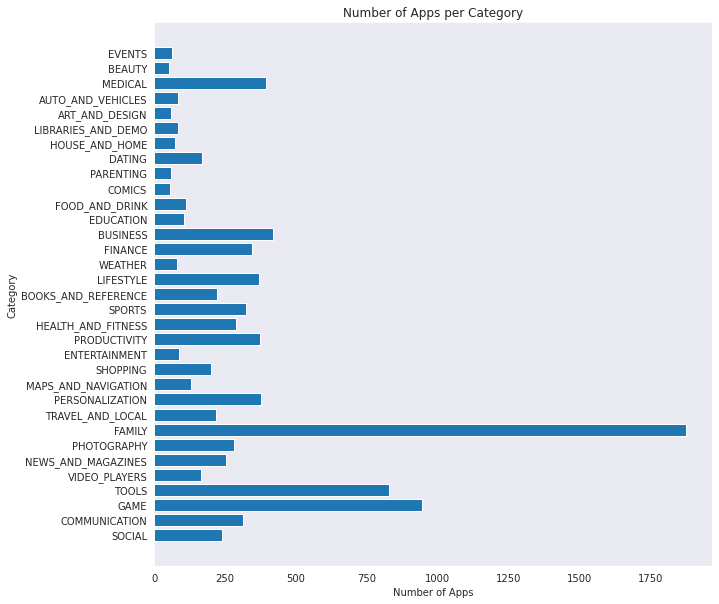

In [195]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.barh(y =labels, width=values)
ax.set_xlabel("Number of Apps")
ax.set_ylabel("Category")
plt.title("Number of Apps per Category")
sns.set_style('dark')
plt.show()

### Countplot

In [203]:
# plt.figure(figsize=(10,5))
# sns.set_style('darkgrid')
# sns.countplot(x = df.Category, data=df)
# plt.title("Number of Apps per Category")
# plt.ylabel("Number of Apps")
# plt.xticks(rotation=90)
# plt.show()

**From this plotting we know that most of the apps in the play store are from the categories of `Family`, `Game` and also `Tools`.**

In [210]:
# get the number of installs for each category
# Firstly, we groupby the data according to category and installs
df.columns
categories = df.groupby(['Category'])
new_df = categories['Installs'].sum().reset_index()
new_df

,Category,Installs
0,ART_AND_DESIGN,113238100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665969576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140925107
8,EDUCATION,188952000
9,ENTERTAINMENT,989660000


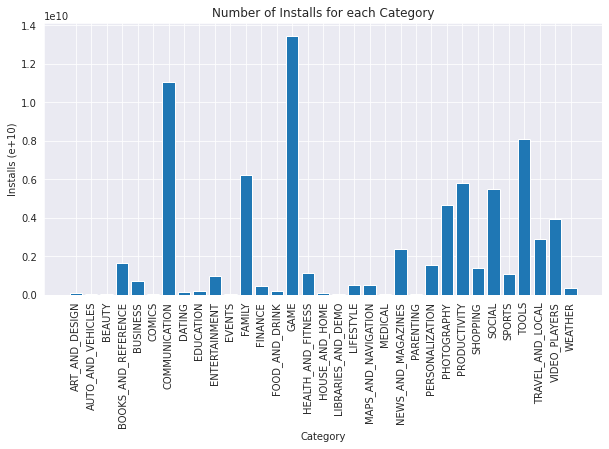

In [226]:
# bar plot using matplotlib
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.bar(x=new_df.Category, height=new_df.Installs)
ax.set_xlabel("Category")
ax.set_ylabel("Installs (e+10)")
ax.set_title("Number of Installs for each Category")
plt.xticks(rotation=90)
plt.show()

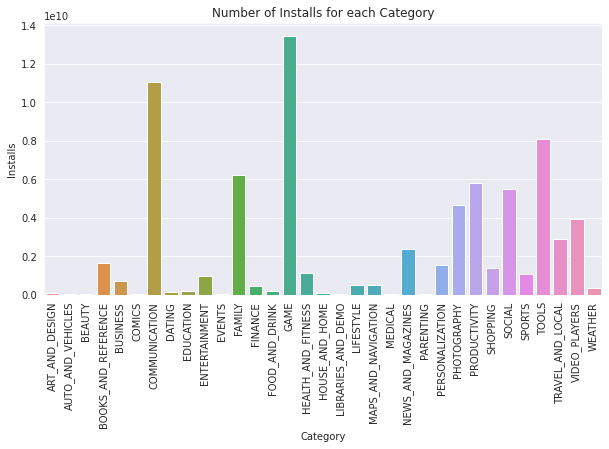

In [230]:
# barplot using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x= new_df.Category, y=new_df.Installs)
plt.title("Number of Installs for each Category")
plt.xticks(rotation=90)
plt.show()

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of `Game` and `Communication`.

In [231]:
# show the distribution of rating using matplotlib and seaborn

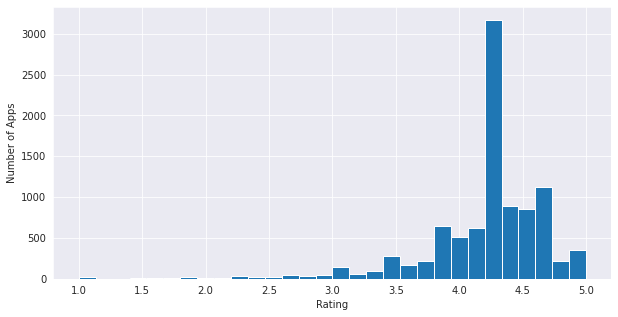

In [239]:
plt.figure(figsize=(10,5))
plt.hist(df.Rating, bins=30)
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.show()

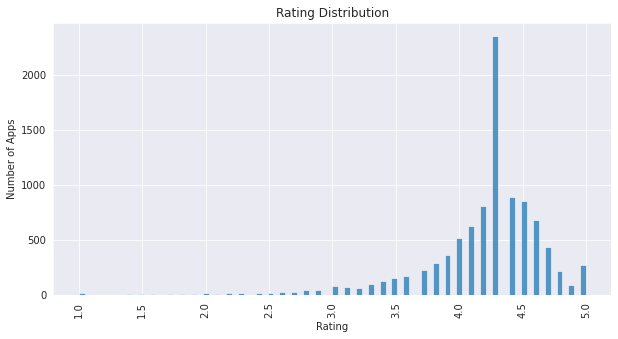

In [241]:
# using seaborn
plt.figure(figsize=(10, 5))
sns.histplot(df.Rating)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

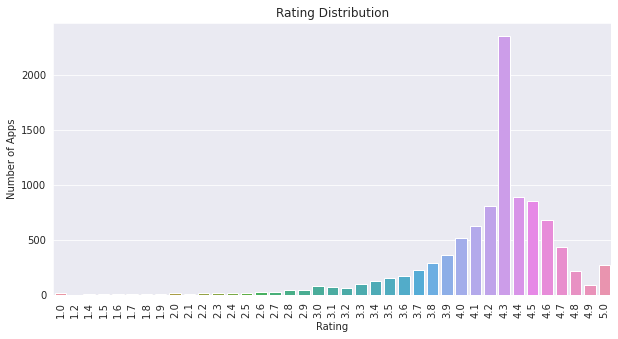

In [245]:
# using seaborn
plt.figure(figsize=(10, 5))
sns.countplot(x = 'Rating', data=df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [249]:
# plot the line graphs of reviews, size, installs and price per rating
new_df1 = df.groupby('Rating').sum().reset_index()
new_df1

,Rating,Reviews,Size,Installs,Price
0,1.0,28.0,228.800000,5170,4.48
1,1.2,44.0,27.000000,1000,0.00
2,1.4,98.0,20.200000,7000,0.00
3,1.5,61.0,54.000000,1105,0.00
4,1.6,691.0,64.600000,152000,0.00
5,1.7,2360.0,80.300000,81700,4.99
6,1.8,3418.0,49.066211,519500,1.49
7,1.9,1875.0,154.200000,189000,0.00
8,2.0,2997.0,191.400000,5040150,4.59
9,2.1,3073.0,164.200000,182000,0.00


In [251]:
new_df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.512698,0.589423,0.511666,0.400607
Reviews,0.512698,1.000000,0.821395,0.912285,0.449798
Size,0.589423,0.821395,1.000000,0.953054,0.793728
Installs,0.511666,0.912285,0.953054,1.000000,0.631094
Price,0.400607,0.449798,0.793728,0.631094,1.000000


<AxesSubplot:>

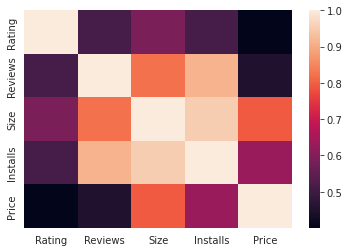

In [250]:
sns.heatmap(new_df1.corr())

<Figure size 432x288 with 0 Axes>

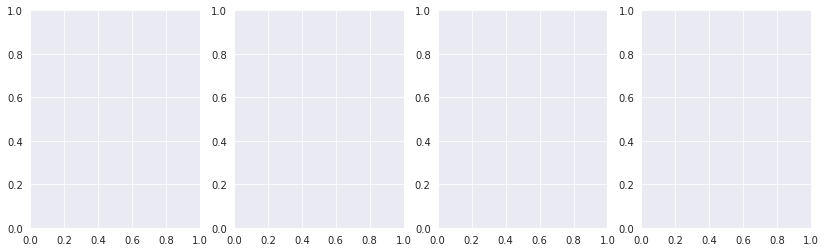

In [255]:
fig = plt.figure()
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

In [257]:
new_df1.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price'], dtype='object')

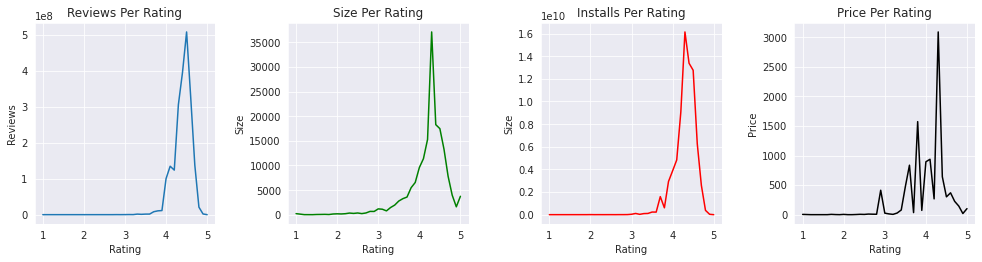

In [270]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))
axes[0].plot('Rating','Reviews', data=new_df1)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')


axes[1].plot('Rating','Size', data=new_df1, color='g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot('Rating','Installs', data=new_df1, color='r')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Size')
axes[2].set_title('Installs Per Rating')
plt.tight_layout(pad=2)

axes[3].plot('Rating','Price', data=new_df1, color='k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')
plt.tight_layout(pad=2)

plt.show()

**From the above plottings, we can imply that most of the apps with higher rating range of `4.0 - 4.7` are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.**

In [274]:
# application type distribution means Free or paid using matplotlib and seaborn
type_df = df.Type.value_counts().reset_index()
type_df

,index,Type
0,Free,8904
1,Paid,754


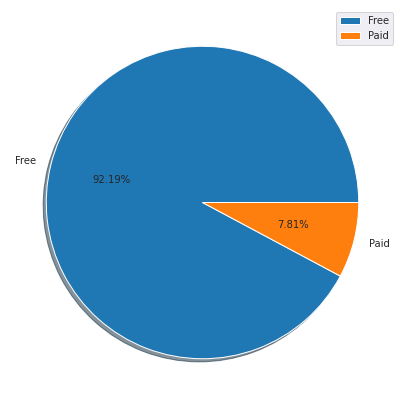

In [284]:
# using matplotlib
plt.figure(figsize=(7,8))
plt.pie(x=type_df.Type,labels=type_df['index'].values,autopct='%.2f%%' , shadow=True)
plt.legend()
plt.show()

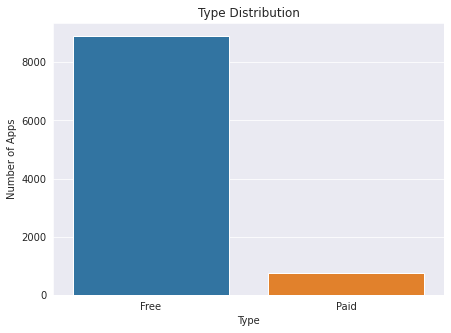

In [295]:
# using seaborn
plt.figure(figsize=(7,5))
sns.countplot(x='Type', data=df)
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

**From the plot we can imply that majority of the apps in the Play Store are Free apps.**